In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

In [34]:
nside=256
factor=1e7

freqs=np.arange(544,1088,step=1)
nfreqs=len(freqs)
shells= nfreqs-1
lmax=3*nside -1
D=13.5 #size of dish in meteres

In [3]:
#load power spectra
cls_hi=np.load("cls_hi_uncorr.npy")
cls_ff=np.load("cl_ff.npy")
cls_sync=np.load("cl_sync.npy")

#load maps
ff=np.load("ff_maps.npy")
sync=np.load("sync_maps.npy")
hi_maps= np.load("hi_maps.npy")
all_maps=np.load("contaminated_maps.npy")

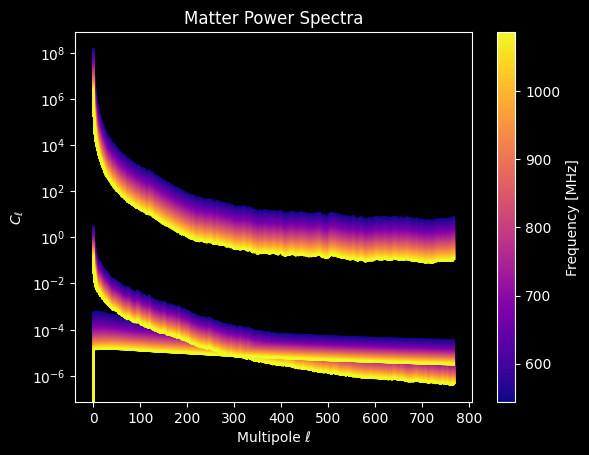

In [35]:
# Normalize for colormap
cmap = plt.get_cmap('plasma')
norm = plt.Normalize(freqs.min(), freqs.max())

fig, ax = plt.subplots()

for i, f in enumerate(freqs[:-1]):
    ax.plot(cls_hi[i], color=cmap(norm(f)))
    ax.plot(cls_sync[i,:]/factor, color=cmap(norm(f))) #top spectra
    
    ax.plot(cls_ff[i,:], color=cmap(norm(f)))

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy for older matplotlib versions
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Frequency [MHz]')

ax.set_yscale('log')
ax.set_xlabel('Multipole ℓ')
ax.set_ylabel(r'$C_\ell$')
ax.set_title('Matter Power Spectra')
plt.style.use('dark_background')
plt.show()

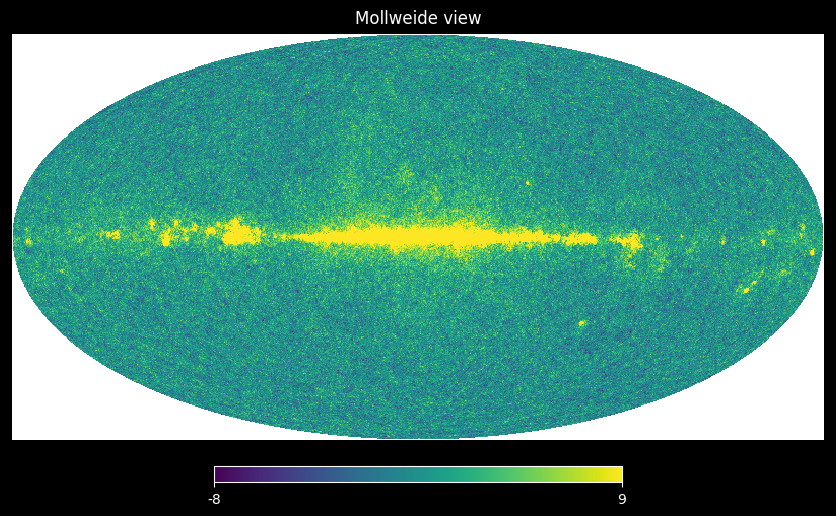

In [52]:
hp.mollview(hi_maps[0] +sync[0]/factor +ff[0], min=-8, max=9)

In [53]:
print(shells)
remainder = shells % 3
print(remainder)

543
0


the FWHM of the beam is given in radians as $\theta \approx 1.22 \frac{\lambda}{D}= 1.22\frac{c}{\nu D}$. Where $\lambda$ and $D$ are both in metres. Since frequencies are in MHz convert them to Hz. The higher the frequency, the lower the FWHM of the beam, the better the resolution.

In [57]:
#apply beam
smoothed_maps_1=np.zeros((shells//3, hp.nside2npix(nside)))
for i in range(shells//3):
    print ("smoothing map %d" % i)
    beam= 1.22*constants.c/(1e6*freqs[i]*D)
    smoothed_maps_1[i,:]= hp.smoothing(hi_maps[i,:]+sync[i,:]/factor +ff[i,:],fwhm=beam )

smoothing map 0
smoothing map 1
smoothing map 2
smoothing map 3
smoothing map 4
smoothing map 5
smoothing map 6
smoothing map 7
smoothing map 8
smoothing map 9
smoothing map 10
smoothing map 11
smoothing map 12
smoothing map 13
smoothing map 14
smoothing map 15
smoothing map 16
smoothing map 17
smoothing map 18
smoothing map 19
smoothing map 20
smoothing map 21
smoothing map 22
smoothing map 23
smoothing map 24
smoothing map 25
smoothing map 26
smoothing map 27
smoothing map 28
smoothing map 29
smoothing map 30
smoothing map 31
smoothing map 32
smoothing map 33
smoothing map 34
smoothing map 35
smoothing map 36
smoothing map 37
smoothing map 38
smoothing map 39
smoothing map 40
smoothing map 41
smoothing map 42
smoothing map 43
smoothing map 44
smoothing map 45
smoothing map 46
smoothing map 47
smoothing map 48
smoothing map 49
smoothing map 50
smoothing map 51
smoothing map 52
smoothing map 53
smoothing map 54
smoothing map 55
smoothing map 56
smoothing map 57
smoothing map 58
smoothi

In [58]:
#apply beam
smoothed_maps_2=np.zeros((shells//3, hp.nside2npix(nside)))
for i in range(shells//3):
    print(f"Smoothing map {i + shells//3}")
    
    beam= 1.22*constants.c/(1e6*freqs[i+shells//3]*D)
    smoothed_maps_2[i,:]= hp.smoothing(hi_maps[i+shells//3,:]+sync[i+shells//3,:]/factor +ff[i+shells//3,:],fwhm=beam )

Smoothing map 181
Smoothing map 182
Smoothing map 183
Smoothing map 184
Smoothing map 185
Smoothing map 186
Smoothing map 187
Smoothing map 188
Smoothing map 189
Smoothing map 190
Smoothing map 191
Smoothing map 192
Smoothing map 193
Smoothing map 194
Smoothing map 195
Smoothing map 196
Smoothing map 197
Smoothing map 198
Smoothing map 199
Smoothing map 200
Smoothing map 201
Smoothing map 202
Smoothing map 203
Smoothing map 204
Smoothing map 205
Smoothing map 206
Smoothing map 207
Smoothing map 208
Smoothing map 209
Smoothing map 210
Smoothing map 211
Smoothing map 212
Smoothing map 213
Smoothing map 214
Smoothing map 215
Smoothing map 216
Smoothing map 217
Smoothing map 218
Smoothing map 219
Smoothing map 220
Smoothing map 221
Smoothing map 222
Smoothing map 223
Smoothing map 224
Smoothing map 225
Smoothing map 226
Smoothing map 227
Smoothing map 228
Smoothing map 229
Smoothing map 230
Smoothing map 231
Smoothing map 232
Smoothing map 233
Smoothing map 234
Smoothing map 235
Smoothing 

In [59]:
#apply beam
smoothed_maps_3=np.zeros((shells//3, hp.nside2npix(nside)))
for i in range(shells//3):
    print(f"Smoothing map {i + 2*shells//3}")
    beam= 1.22*constants.c/(1e6*freqs[i+2*shells//3]*D)
    smoothed_maps_3[i,:]= hp.smoothing(hi_maps[i+2*shells//3,:]+sync[i+2*shells//3,:]/factor +ff[i+2*shells//3,:],fwhm=beam )

Smoothing map 362
Smoothing map 363
Smoothing map 364
Smoothing map 365
Smoothing map 366
Smoothing map 367
Smoothing map 368
Smoothing map 369
Smoothing map 370
Smoothing map 371
Smoothing map 372
Smoothing map 373
Smoothing map 374
Smoothing map 375
Smoothing map 376
Smoothing map 377
Smoothing map 378
Smoothing map 379
Smoothing map 380
Smoothing map 381
Smoothing map 382
Smoothing map 383
Smoothing map 384
Smoothing map 385
Smoothing map 386
Smoothing map 387
Smoothing map 388
Smoothing map 389
Smoothing map 390
Smoothing map 391
Smoothing map 392
Smoothing map 393
Smoothing map 394
Smoothing map 395
Smoothing map 396
Smoothing map 397
Smoothing map 398
Smoothing map 399
Smoothing map 400
Smoothing map 401
Smoothing map 402
Smoothing map 403
Smoothing map 404
Smoothing map 405
Smoothing map 406
Smoothing map 407
Smoothing map 408
Smoothing map 409
Smoothing map 410
Smoothing map 411
Smoothing map 412
Smoothing map 413
Smoothing map 414
Smoothing map 415
Smoothing map 416
Smoothing 

In [60]:
np.save("smoothed_maps_1.npy", smoothed_maps_1)
np.save("smoothed_maps_2.npy", smoothed_maps_2)
np.save("smoothed_maps_3.npy", smoothed_maps_3)

In [ ]:
#combine all smoothed maps
# smoothed_maps = np.vstack([smoothed_maps_1, smoothed_maps_2, smoothed_maps_3])

: 

In [ ]:
# np.save("smoothed_maps.npy", smoothed_maps)

In [61]:
print(smoothed_maps_1.shape)

(181, 786432)


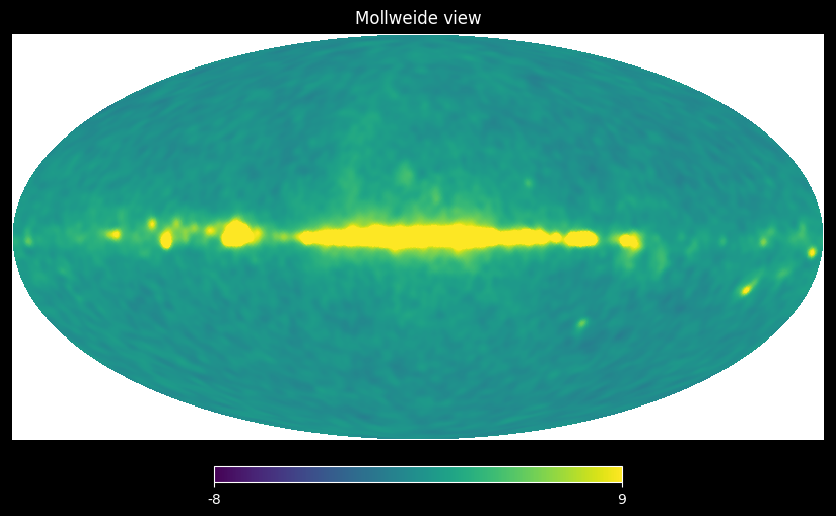

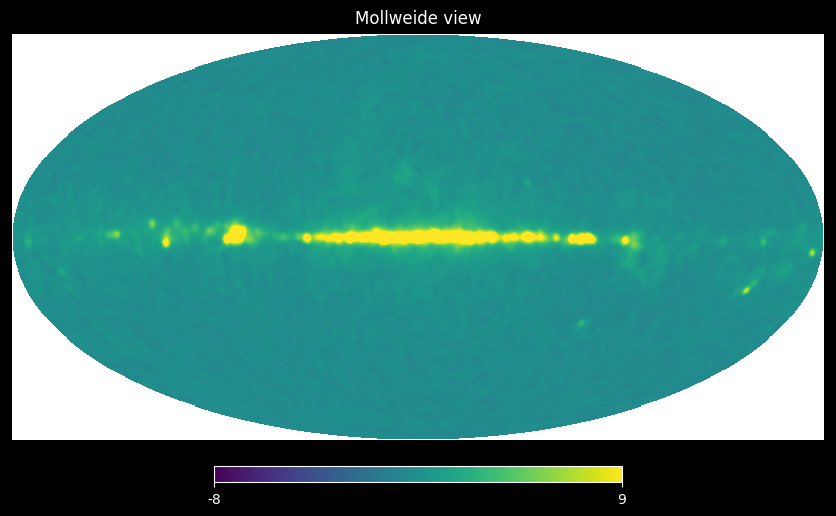

: 

In [ ]:
hp.mollview(smoothed_maps_1[0], min=-8, max=9)
hp.mollview(smoothed_maps_2[0], min=-8, max=9)